In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from src.cade_outliers import CADEOutliers

# CADE for 2-dim data

In [2]:
# Generate data
# X consists of a mix of 3 normal distributions
# The 3rd is a small portion of anomalies
X = np.vstack([2 * np.random.randn(5000, 2), 7 + np.random.randn(3000, 2), 25 + np.random.randn(100, 2)])
y = np.hstack([np.zeros(8000), np.ones(100)])

In [3]:
print('The shape of X: {}'.format(X.shape))

The shape of X: (8100, 2)


In [4]:
# Split the data into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [5]:
# Create CADE outliers object with uniform distribution of artifical anomalies and with size of 100% of the given dataset
cade = CADEOutliers(
    classifier=RandomForestClassifier(max_depth=3), 
    A_dist='uniform', 
    A_size=1.
)

In [6]:
# Fit probability density of X using X_train
cade.fit(X_train)

In [7]:
# Get rankings for X_test. Lower values indicate higher similarity to outliers
ranking_by_dens = cade.get_ranking(X_test)

In [8]:
print('ROC AUC of ranking anomalies by CADE on test data: {}'.format(roc_auc_score(y_test, -ranking_by_dens)))

ROC AUC of ranking anomalies by CADE on test data: 0.9968398432562254


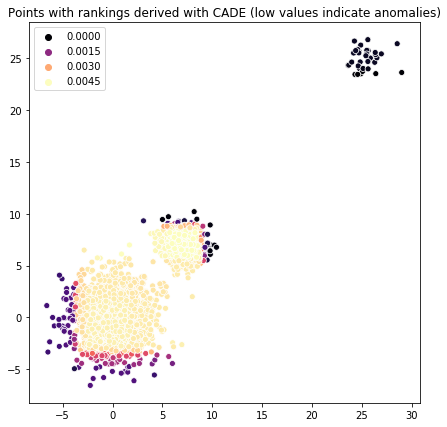

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=ranking_by_dens, ax=ax, palette='magma')
plt.title('Points with rankings derived with CADE (low values indicate anomalies)')
plt.show()

# CADE for 42-dim data

In [10]:
# Generate data
# X consists of a mix of 3 normal distributions
# The 3rd is a small portion of anomalies
X = np.vstack([2 * np.random.randn(5000, 42), 7 + np.random.randn(3000, 42), 25 + np.random.randn(100, 42)])
y = np.hstack([np.zeros(8000), np.ones(100)])

In [11]:
print('The shape of X: {}'.format(X.shape))

The shape of X: (8100, 42)


In [12]:
# Split the data into train and test part
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [13]:
# Create CADE outliers object with uniform distribution of artifical anomalies and with size of 100% of the given dataset
cade = CADEOutliers(
    classifier=RandomForestClassifier(max_depth=3), 
    A_dist='uniform', 
    A_size=1.
)

In [14]:
# Fit probability density of X using X_train
cade.fit(X_train)

In [15]:
# Get rankings for X_test. Lower values indicate higher similarity to outliers
ranking_by_dens = cade.get_ranking(X_test)

In [16]:
print('ROC AUC of ranking anomalies by CADE: {}'.format(roc_auc_score(y_test, -ranking_by_dens)))

ROC AUC of ranking anomalies by CADE: 0.9970564407237376
